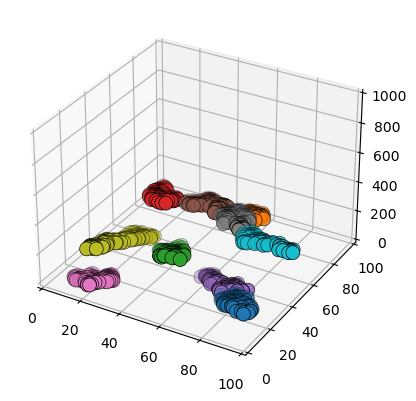

In [7]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random


             
    
class create_monomer_coordinates:
    def __init__(self, **kwargs):
        self.polymer_dictionary = kwargs.get('polymer_dictionary')
        self.polymer_radius = kwargs.get('polymer_radius')
        self.cube_size = kwargs.get('cube_size')
        self.polymer = kwargs.get('polymers')
        self.z_size = kwargs.get('z_size')
        
    def gen_new_coords(self, polymer_dictionary, polymer, polymer_radius, cube_size, z_size):
        # Generates a random digit between 0.1 and r (= 1).
        #Declare polymer radius
        self.polymer_radius = polymer_radius
        
        # Generates random number between 0 and polymer_radius, then randomly makes it negative or positive
        a = random.uniform(0.0, self.polymer_radius) * random.choice((-1, 1))
        b = random.uniform(0.0, self.polymer_radius) * random.choice((-1, 1))
        c = random.uniform(0.0, self.polymer_radius) * random.choice((-1, 1))
        
 
        # Declaring the polymer dictionary
        self.polymer_dictionary = polymer_dictionary
        self.cube_size = cube_size
        self.polymer = polymer
        self.z_size = z_size     
        
        self.new_x_coordinate = self.polymer_dictionary[self.polymer]['m_x'][-1] + a
        if (self.new_x_coordinate < 0) | (self.new_x_coordinate > self.cube_size):
            self.new_x_coordinate = self.polymer_dictionary[self.polymer]['m_x'][-1] - a
        
        
        self.new_y_coordinate = self.polymer_dictionary[self.polymer]['m_y'][-1] + b
        if (self.new_y_coordinate < 0) | (self.new_y_coordinate > self.cube_size):
            self.new_y_coordinate = self.polymer_dictionary[self.polymer]['m_y'][-1] -b
        
        
        self.new_z_coordinate = self.polymer_dictionary[self.polymer]['m_z'][-1] + c
        if (self.new_z_coordinate < 0) | (self.new_z_coordinate > self.z_size):
            self.new_z_coordinate = self.polymer_dictionary[self.polymer]['m_z'][-1] - c


        
        
class create_second_monomer_coordinates:
    def __init__(self, **kwargs):
        self.polymer_dictionary = kwargs.get('polymer_dictionary')
        self.polymer_radius = kwargs.get('polymer_radius')
        self.cube_size = kwargs.get('cube_size')
        self.polymer = kwargs.get('polymers')
        
    def gen_new_second_coords(self, polymer_dictionary, polymer, polymer_radius, cube_size):
        # Generates a random digit between 0.1 and r (= 1).
        #Declare polymer radius
        self.polymer_radius = polymer_radius
        
        # Generates random number between 0 and polymer_radius, then randomly makes it negative or positive
        a = random.uniform(0.0, self.polymer_radius) * random.choice((-1, 1))
        b = random.uniform(0.0, self.polymer_radius) * random.choice((-1, 1))
        c = random.uniform(0.0, self.polymer_radius) * random.choice((-1, 1))
        
 
        # Declaring the polymer dictionary
        self.polymer_dictionary = polymer_dictionary
        self.cube_size = cube_size
        self.polymer = polymer
             
        
        self.new_x_coordinate = self.polymer_dictionary[self.polymer]['m_x'][0] + a
        if (self.new_x_coordinate < 0) | (self.new_x_coordinate > self.cube_size):
            self.new_x_coordinate = self.polymer_dictionary[self.polymer]['m_x'][0] - a
        
        
        self.new_y_coordinate = self.polymer_dictionary[self.polymer]['m_y'][0] + b
        if (self.new_y_coordinate < 0) | (self.new_y_coordinate > self.cube_size):
            self.new_y_coordinate = self.polymer_dictionary[self.polymer]['m_y'][0] -b
        
        
        self.new_z_coordinate = self.polymer_dictionary[self.polymer]['m_z'][0] + c
        if (self.new_z_coordinate < 0) | (self.new_z_coordinate > self.cube_size):
            self.new_z_coordinate = self.polymer_dictionary[self.polymer]['m_z'][0] - c



class check_overlap:
    
    def __init__(self, **kwargs):
        
        self.n_polymers = kwargs.get('n_polymers')
        self.polymer_dictionary = kwargs.get('polymer_dictionary')
        self.new_x_coordinate = kwargs.get('new_x_coordinate')
        self.new_y_coordinate = kwargs.get('new_y_coordinate')
        self.new_z_coordinate = kwargs.get('new_z_coordinate')
        self.monomer_radius = kwargs.get('monomer_radius')
        self.polymer = kwargs.get('polymers')
        self.index = kwargs.get('index')
        self.polymers= kwargs.get('polymer')
        self.current_monomer_no = kwargs.get('current_monomer_no')
        self.current_polymer_no = kwargs.get('current_polymer_no')
#current_monomer_no is the last monomer
#current_polymer_no is the polymer the monomer being made will be added to 
        
    def no_overlap(self, n_polymers, new_x_coordinate, new_y_coordinate, new_z_coordinate, monomer_radius, polymer_dictionary, polymer, current_monomer_no, current_polymer_no):
        #check for overlap, i.e. within rad of other monomers  
        
        # Declaring the polymer dictionary
        self.polymer_dictionary = polymer_dictionary
        self.cube_size = cube_size
        self.polymer = polymer
        self.new_x_coordinate = new_x_coordinate
        self.new_y_coordinate = new_y_coordinate
        self.new_z_coordinate = new_z_coordinate
        self.monomer_radius = monomer_radius
        self.n_polymers = n_polymers
        self.current_monomer_no = current_monomer_no
        self.current_polymer_no = current_polymer_no

        
        
        #First time conditions are met it will stop and return "false"
        for i in np.arange(0, self.current_polymer_no):
            for m in np.arange(0, self.current_monomer_no):
                if ((self.new_z_coordinate - self.monomer_radius) > self.polymer_dictionary[f'polymer_{i}']['m_z'][m])\
                & ((self.new_z_coordinate + self.monomer_radius) < self.polymer_dictionary[f'polymer_{i}']['m_z'][m])\
                & ((self.new_y_coordinate - self.monomer_radius) > self.polymer_dictionary[f'polymer_{i}']['m_y'][m])\
                & ((self.new_y_coordinate + self.monomer_radius) < self.polymer_dictionary[f'polymer_{i}']['m_y'][m])\
                & ((self.new_x_coordinate - self.monomer_radius) > self.polymer_dictionary[f'polymer_{i}']['m_x'][m])\
                & ((self.new_x_coordinate + self.monomer_radius) < self.polymer_dictionary[f'polymer_{i}']['m_x'][m]):
                    #print("There is overlap at some coordinates")
                    return False
        for k in np.arange((self.current_polymer_no+1), self.n_polymers):
            #print(k)
            for l in np.arange(0, self.current_monomer_no):
                if ((self.new_z_coordinate - self.monomer_radius) > self.polymer_dictionary[f'polymer_{k}']['m_z'][l])\
                & ((self.new_z_coordinate + self.monomer_radius) < self.polymer_dictionary[f'polymer_{k}']['m_z'][l])\
                & ((self.new_y_coordinate - self.monomer_radius) > self.polymer_dictionary[f'polymer_{k}']['m_y'][l])\
                & ((self.new_y_coordinate + self.monomer_radius) < self.polymer_dictionary[f'polymer_{k}']['m_y'][l])\
                & ((self.new_x_coordinate - self.monomer_radius) > self.polymer_dictionary[f'polymer_{k}']['m_x'][l])\
                & ((self.new_x_coordinate + self.monomer_radius) < self.polymer_dictionary[f'polymer_{k}']['m_x'][l]):
                    #print("There is overlap at some coordinates")
                    return False
        #print("All iterations have successfully run")
        return True
            

#inputs required: n_polymers, n_monomers, cube_size, monomer_radius, ballsize, save_data=True/False
n_polymers = 10
n_monomers = 100
cube_size = 100
z_size = 1000
monomer_radius = 2.0
polymer_radius = 1.0
ballsize = 100
save_data = True

#Create dictionary, add first monomer:
polymer_dictionary = {}

for i in np.arange(0, n_polymers):
    #creates subdictionary for each polymer with lists for monomer number and monomer coordinates of all monomers for that polymer
    polymer_dictionary[f'polymer_{i}'] = {'m_no':[], 'm_x':[], 'm_y':[], 'm_z':[],}
        
    #Put initial monomer in list m_no
    polymer_dictionary[f'polymer_{i}']['m_no'].append(0)
        
    #create first monomer coordinates:
    start_x, start_y, start_z = np.random.randint(0, cube_size), np.random.randint(0, cube_size), 0
                
    #Put initial coordiante values in lists:
    polymer_dictionary[f'polymer_{i}']['m_x'].append(start_x)
    polymer_dictionary[f'polymer_{i}']['m_y'].append(start_y)
    polymer_dictionary[f'polymer_{i}']['m_z'].append(start_z)
        

        
#####################################################################

#Instantiate classes:
    
#Generates new monomer coords. Creates new coords within monomer radius, ensures they are within bounds 
#Inputs required: polymer dictionary, monomer_radius, cube_size 
#gen_new_coords(polymer_dictionary, polymer, monomer_radius, cube_size):
#Second monomer coordinates need to be done separately because none others before
create_second_monomer_coordinates_object = create_second_monomer_coordinates()
create_monomer_coordinates_object = create_monomer_coordinates()
    
#checks for overlap, returns boolean: True if coordinates are good, False if overlap 
#Inputs required: new_x_coordinate, new_y_coordinate, new_z_coordinate, monomer_radius, polymer_dictionary, polymer
check_overlap_object = check_overlap()
    

##################################################
#Create monomers:
polymers = list(polymer_dictionary.keys())

for polymer in polymers:
    current_polymer_no = polymers.index(polymer)
    #print(current_polymer_no)
    #create coordinates for second monomer
    current_monomer_no = 0
    while True: 
        create_second_monomer_coordinates_object.gen_new_second_coords(polymer_dictionary, polymer, monomer_radius, cube_size)
        #Check coordinates for overlap
        if check_overlap_object.no_overlap(n_polymers, create_second_monomer_coordinates_object.new_x_coordinate, create_second_monomer_coordinates_object.new_y_coordinate, create_second_monomer_coordinates_object.new_z_coordinate, monomer_radius, polymer_dictionary, polymer, current_monomer_no, current_polymer_no):
            polymer_dictionary[polymer]['m_no'].append(1)
            polymer_dictionary[polymer]['m_x'].append(create_second_monomer_coordinates_object.new_x_coordinate)
            polymer_dictionary[polymer]['m_y'].append(create_second_monomer_coordinates_object.new_y_coordinate)
            polymer_dictionary[polymer]['m_z'].append(create_second_monomer_coordinates_object.new_z_coordinate)
            break
        
for j in np.arange(2, n_monomers):
    for polymer in polymers:
        current_polymer_no = polymers.index(polymer)
        #print(current_polymer_no)
        current_monomer_no = j-1
        #print("current m", current_monomer_no)
        #create coordinates for second monomer
        while True: 
            create_monomer_coordinates_object.gen_new_coords(polymer_dictionary, polymer, monomer_radius, cube_size, z_size)
            #Check coordinates for overlap
            if check_overlap_object.no_overlap(n_polymers, create_monomer_coordinates_object.new_x_coordinate, create_monomer_coordinates_object.new_y_coordinate, create_monomer_coordinates_object.new_z_coordinate, monomer_radius, polymer_dictionary, polymer, current_monomer_no, current_polymer_no):
                polymer_dictionary[polymer]['m_no'].append(j+1)
                polymer_dictionary[polymer]['m_x'].append(create_monomer_coordinates_object.new_x_coordinate)
                polymer_dictionary[polymer]['m_y'].append(create_monomer_coordinates_object.new_y_coordinate)
                polymer_dictionary[polymer]['m_z'].append(create_monomer_coordinates_object.new_z_coordinate)
                break

##################################################################################            
#plots the polymers
# Initialize matplotlib canvas that we will plot a 3D plane on
fig = plt.figure()
# This new axis (`ax`) is a 3D projection
ax = plt.axes(projection="3d")
# Let's set the axis limits for each dimension 10
ax.axes.set_xlim3d(left = 0, right = cube_size) 
ax.axes.set_ylim3d(bottom = 0, top = cube_size) 
ax.axes.set_zlim3d(bottom = 0, top = z_size)
    
#plots monomer density as function of height 
color = np.random.randint(0, 6)

for p in np.arange(0, n_polymers):
    ax.scatter(polymer_dictionary[f'polymer_{p}']['m_x'], polymer_dictionary[f'polymer_{p}']['m_y'], polymer_dictionary[f'polymer_{p}']['m_z'], s=ballsize, edgecolor='k', lw=0.5)
            
plt.show
 
for q in np. arange(0, n_polymers):
    if save_data:
        da = {'x' : polymer_dictionary[f'polymer_{q}']['m_x'], 'y': polymer_dictionary[f'polymer_{q}']['m_y'], 'z': polymer_dictionary[f'polymer_{q}']['m_z']}
        df = pd.DataFrame(data=da)
        df.to_csv(f"polymer2_{q}.csv")
    
